In [1]:
!nvidia-smi

Tue Apr 16 16:45:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics==8.0.28

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


In [4]:
!pip install roboflow

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
# set up environment
import os
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="B4XK2O9LlP6uefaPpsxG")
project = rf.workspace("employee-surveillance-uczqm").project("workplace-monitoring")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to /content/datasets/Workplace-Monitoring-3 in yolov8:: 100%|██████████| 360/360 [00:00<00:00, 4306.13it/s]


In [9]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/Workplace-Monitoring-3/data.yaml epochs=70 imgsz=340 batch=8


100% 6.23M/6.23M [00:00<00:00, 81.0MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Workplace-Monitoring-3/data.yaml, epochs=70, patience=50, batch=8, imgsz=340, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fals

In [10]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

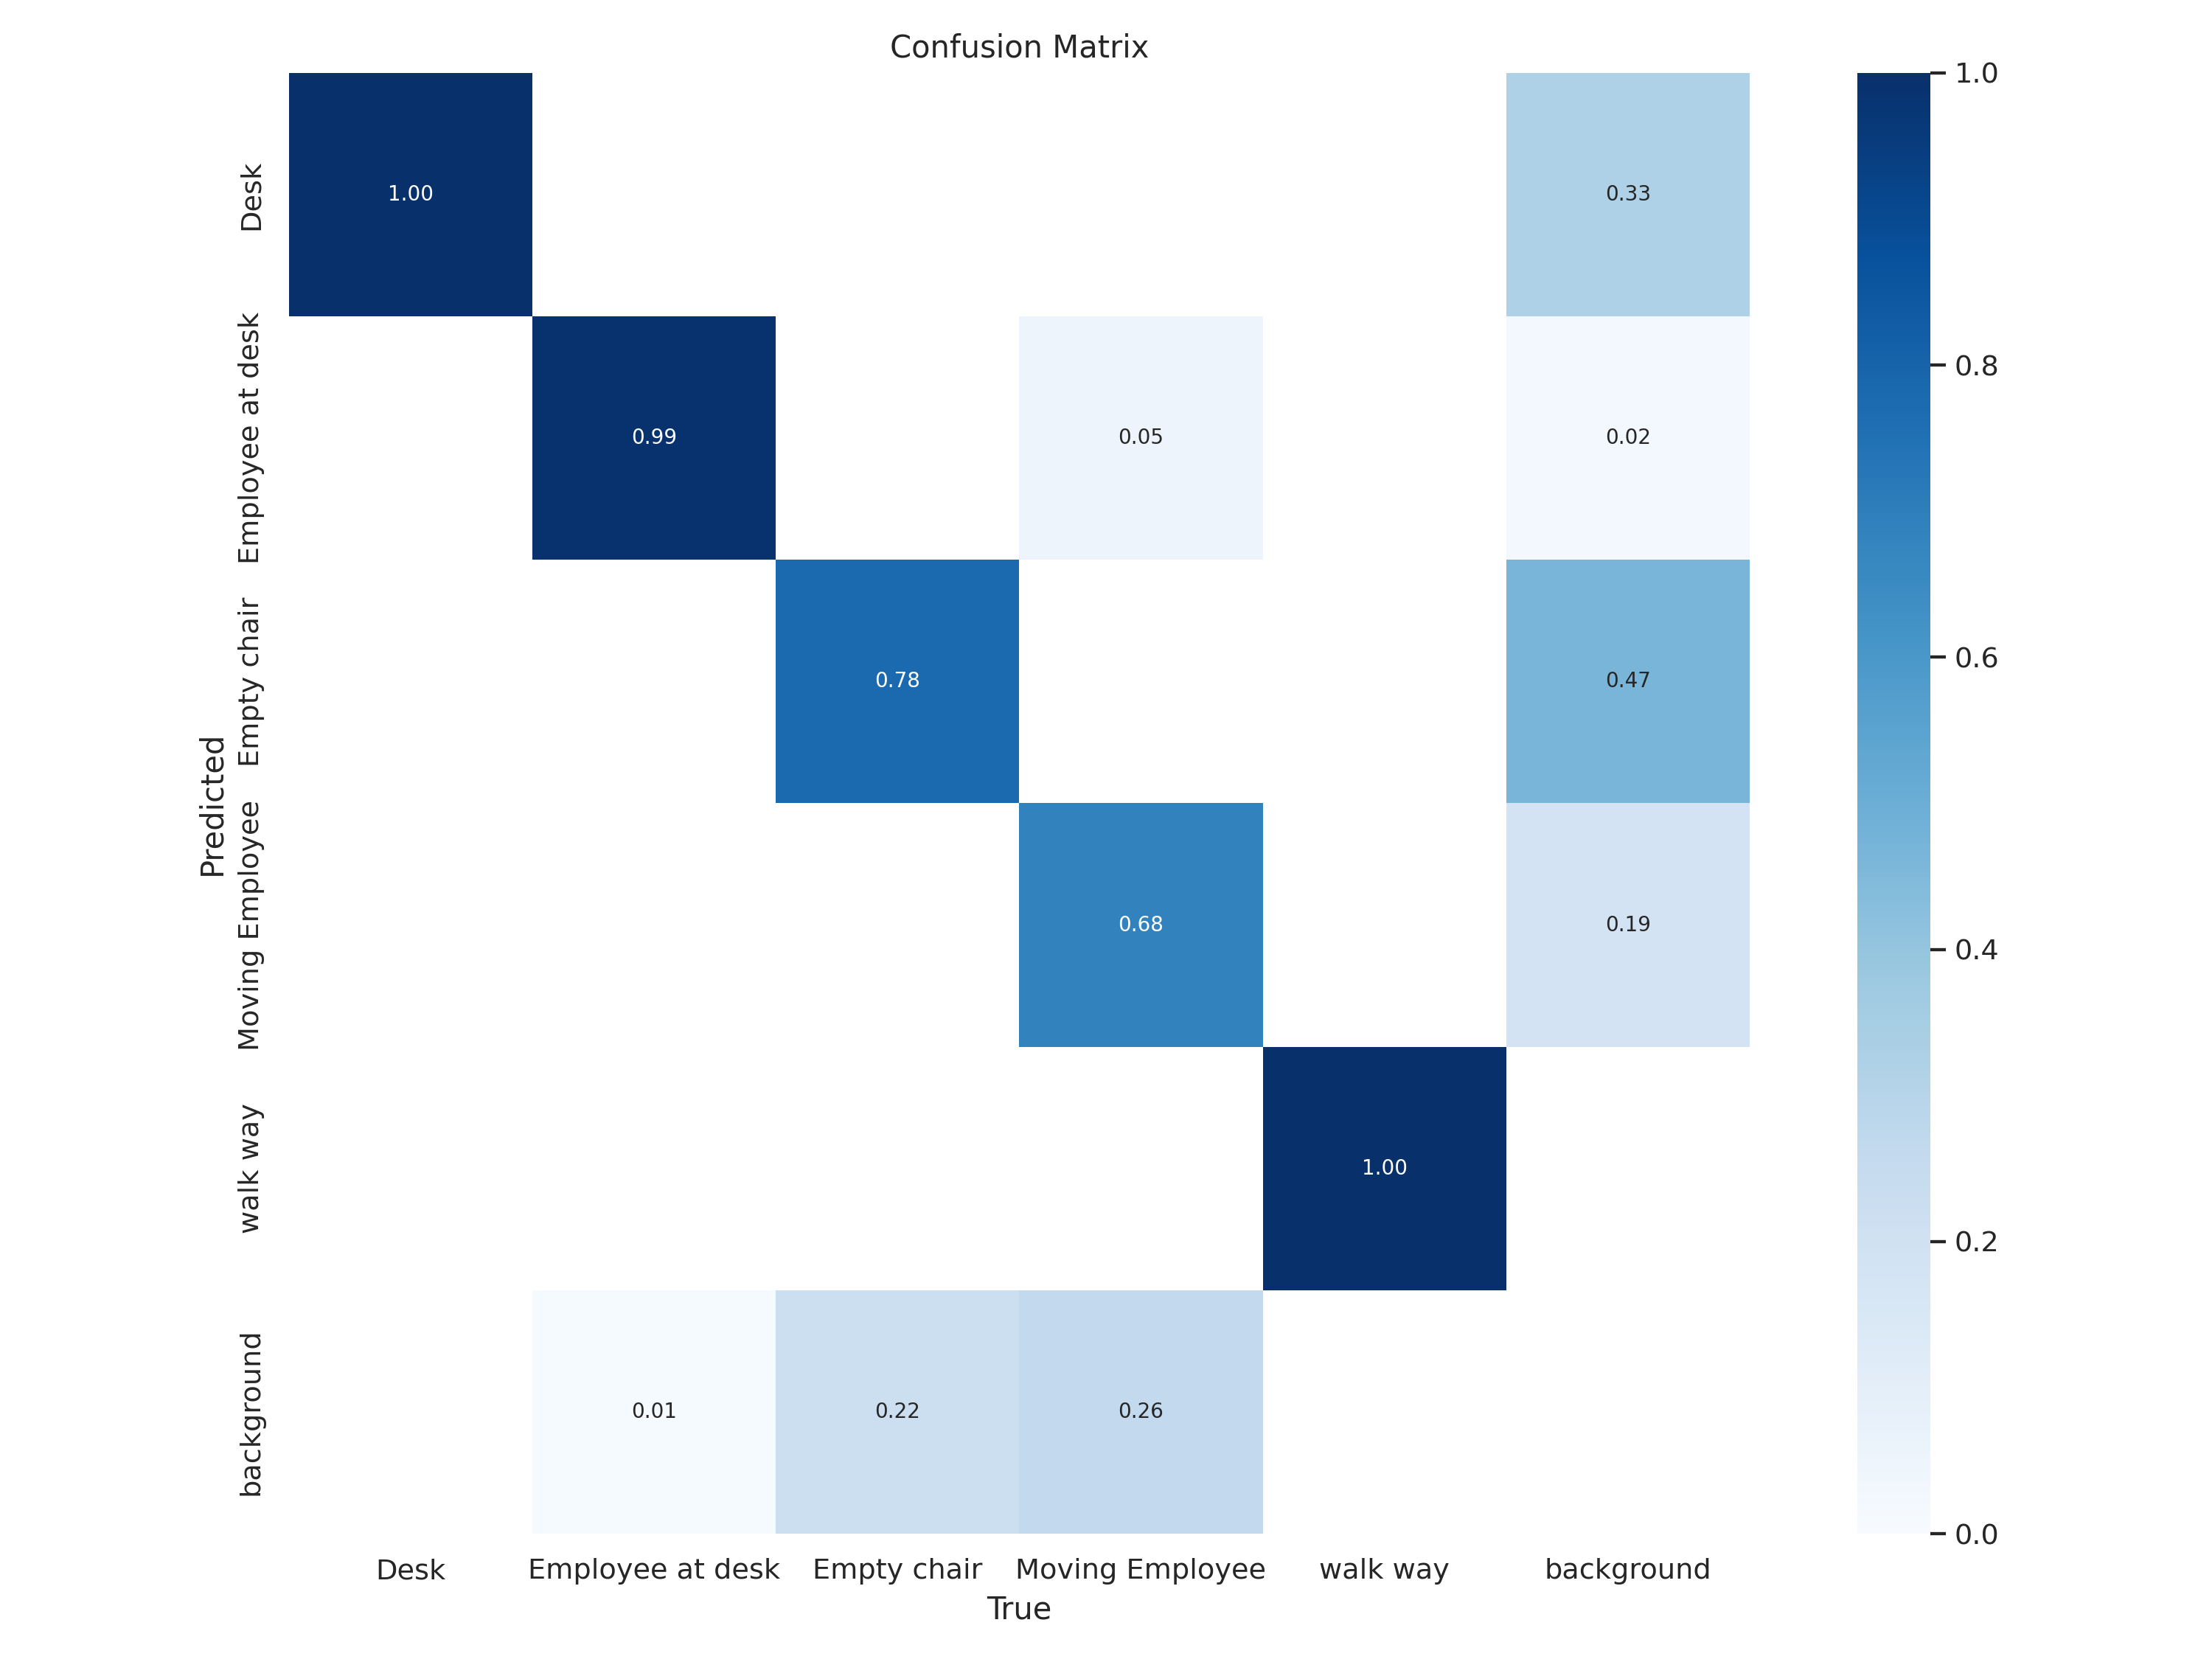

In [11]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

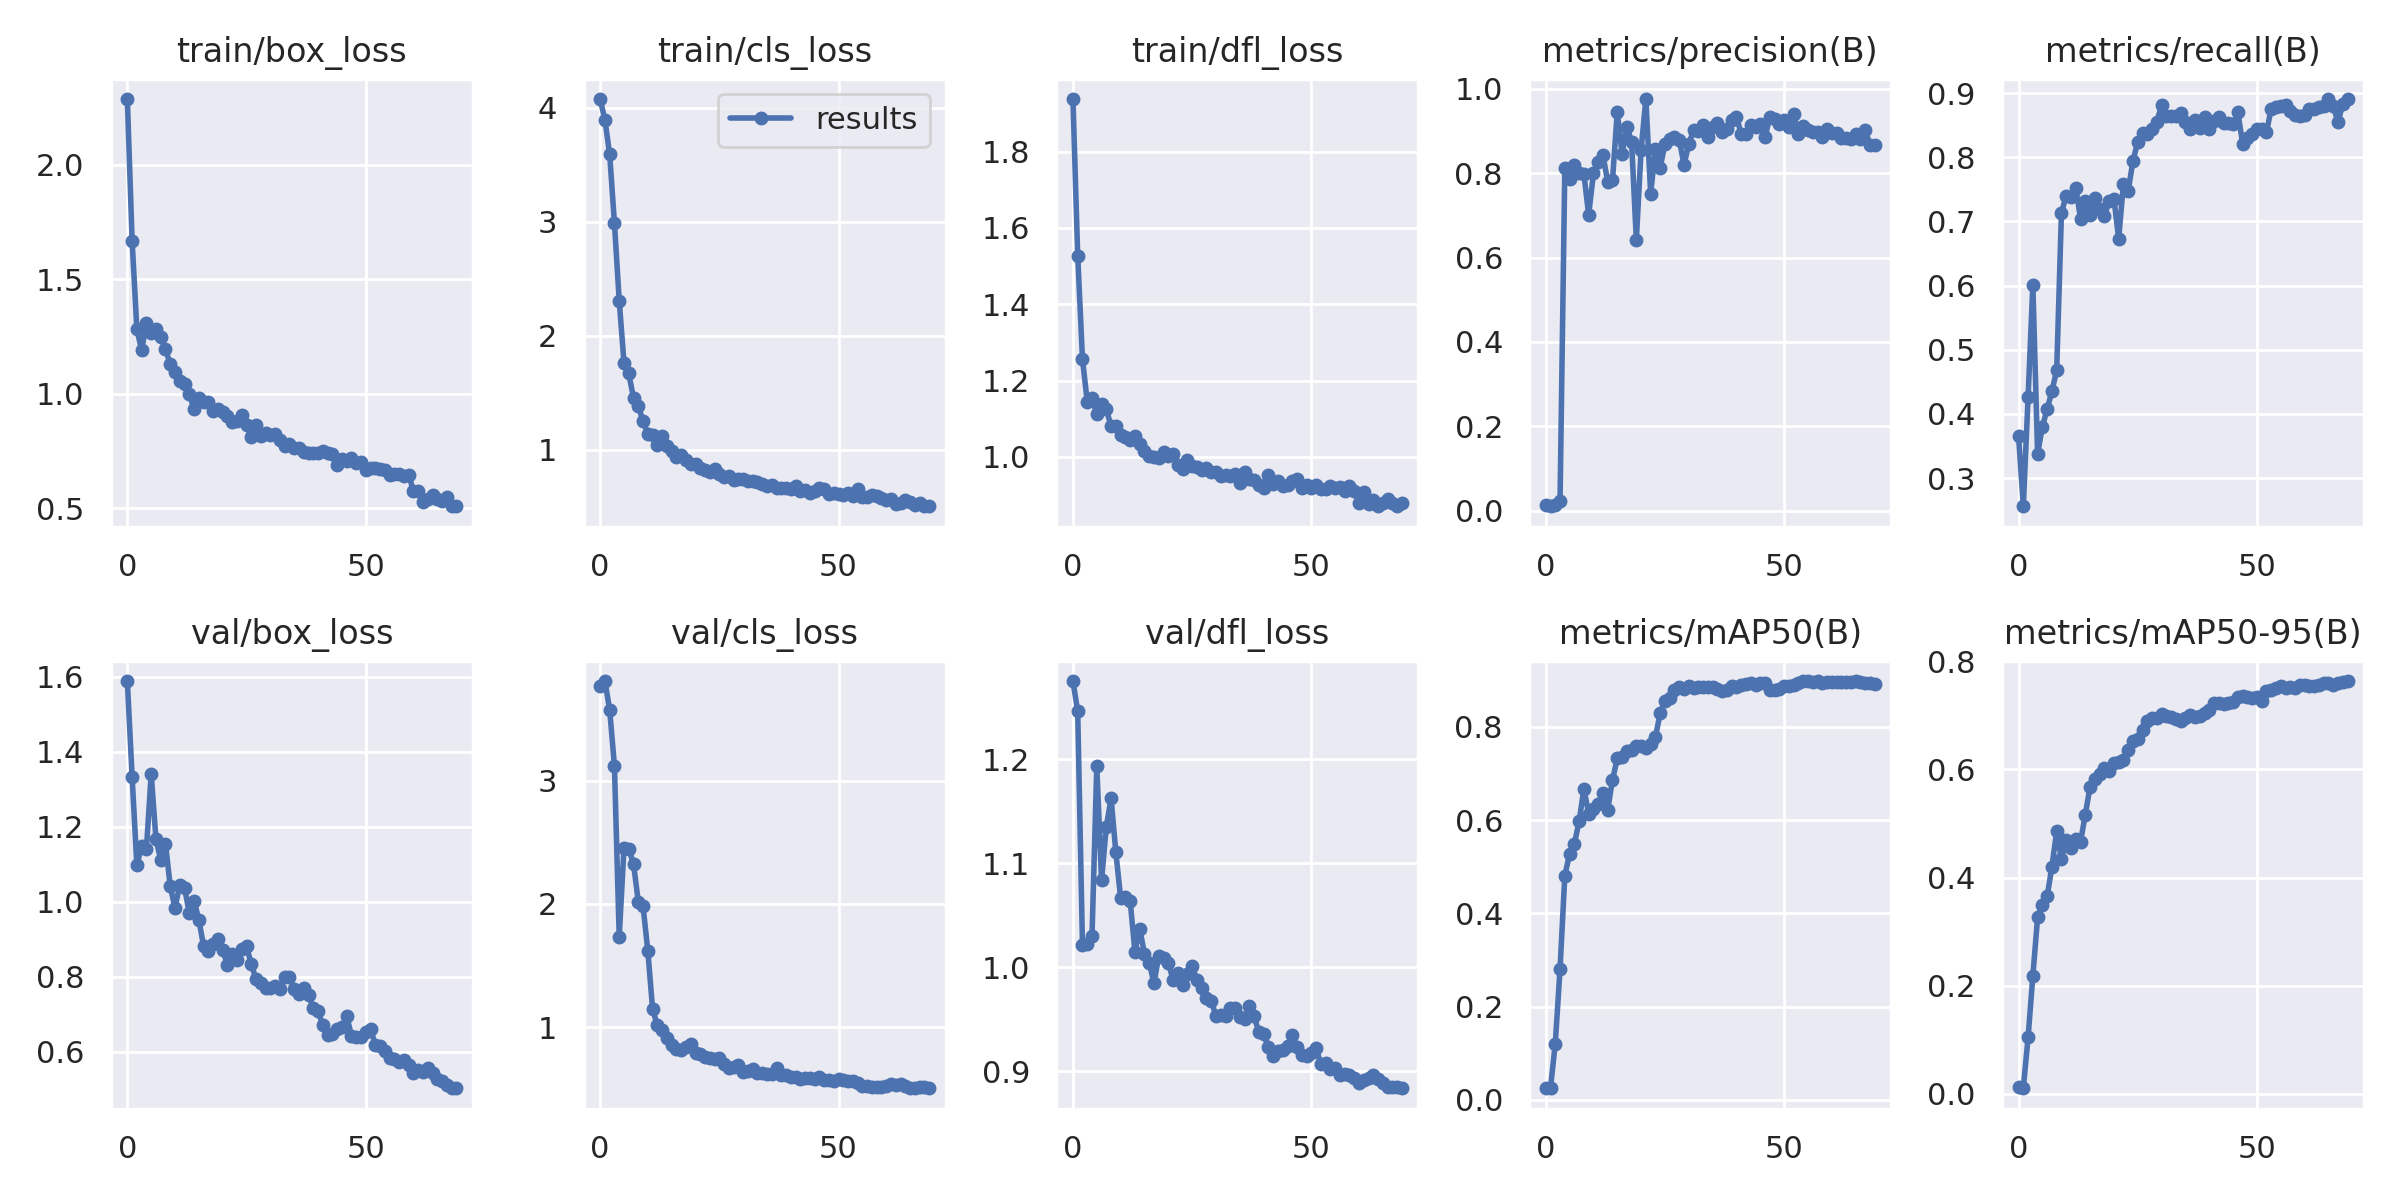

In [13]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [14]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt  data={dataset.location}/data.yaml

2024-04-16 17:22:20.500093: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 17:22:20.500158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 17:22:20.502230: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 17:22:21.911385: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Workplace-Monitoring-3/valid/labels.cache..

In [15]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.2 source={dataset.location}/test/images save_txt=true save_conf=true

2024-04-16 17:22:55.241273: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 17:22:55.241330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 17:22:55.242692: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 17:22:56.412879: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/19 /content/datasets/Wor

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

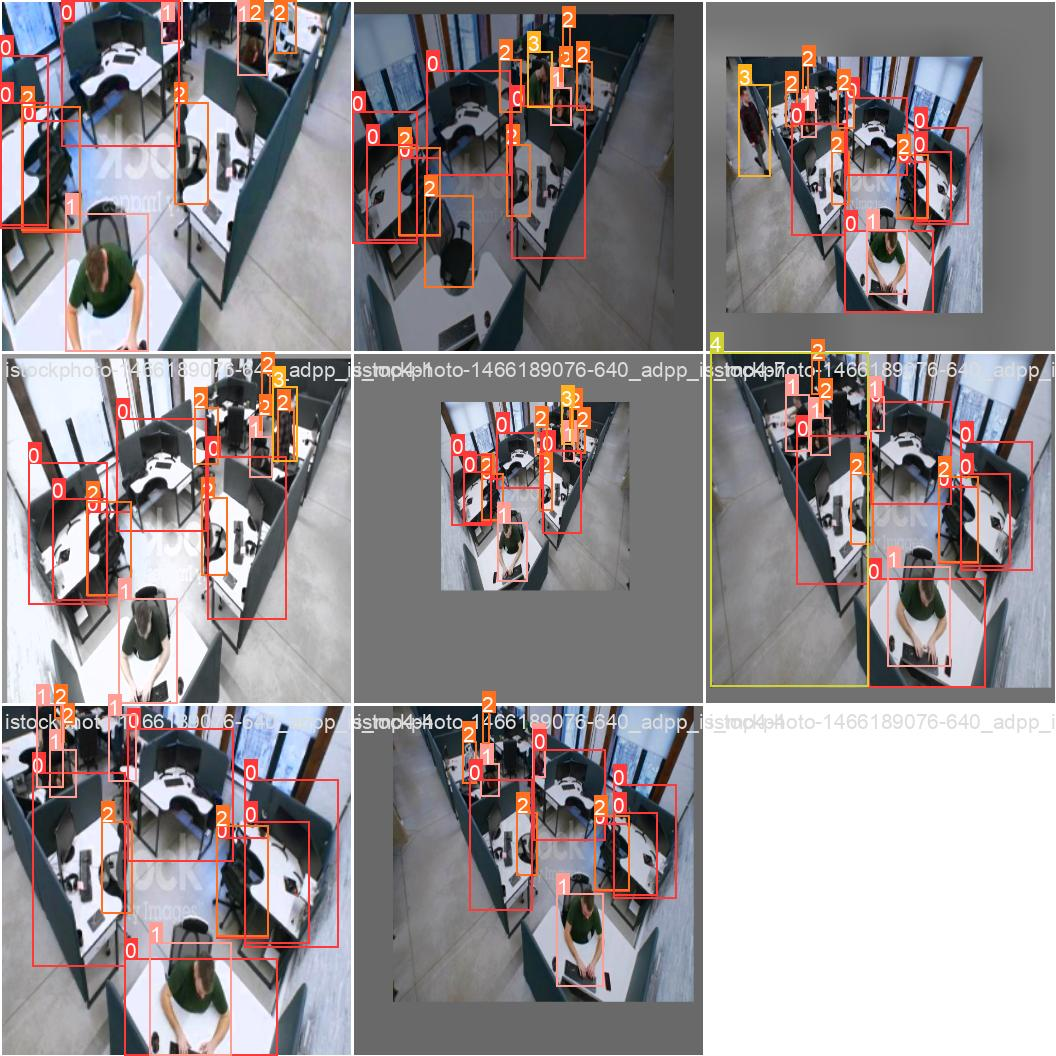

In [19]:
Image(filename=f'/content/runs/detect/train/train_batch960.jpg', width=600)

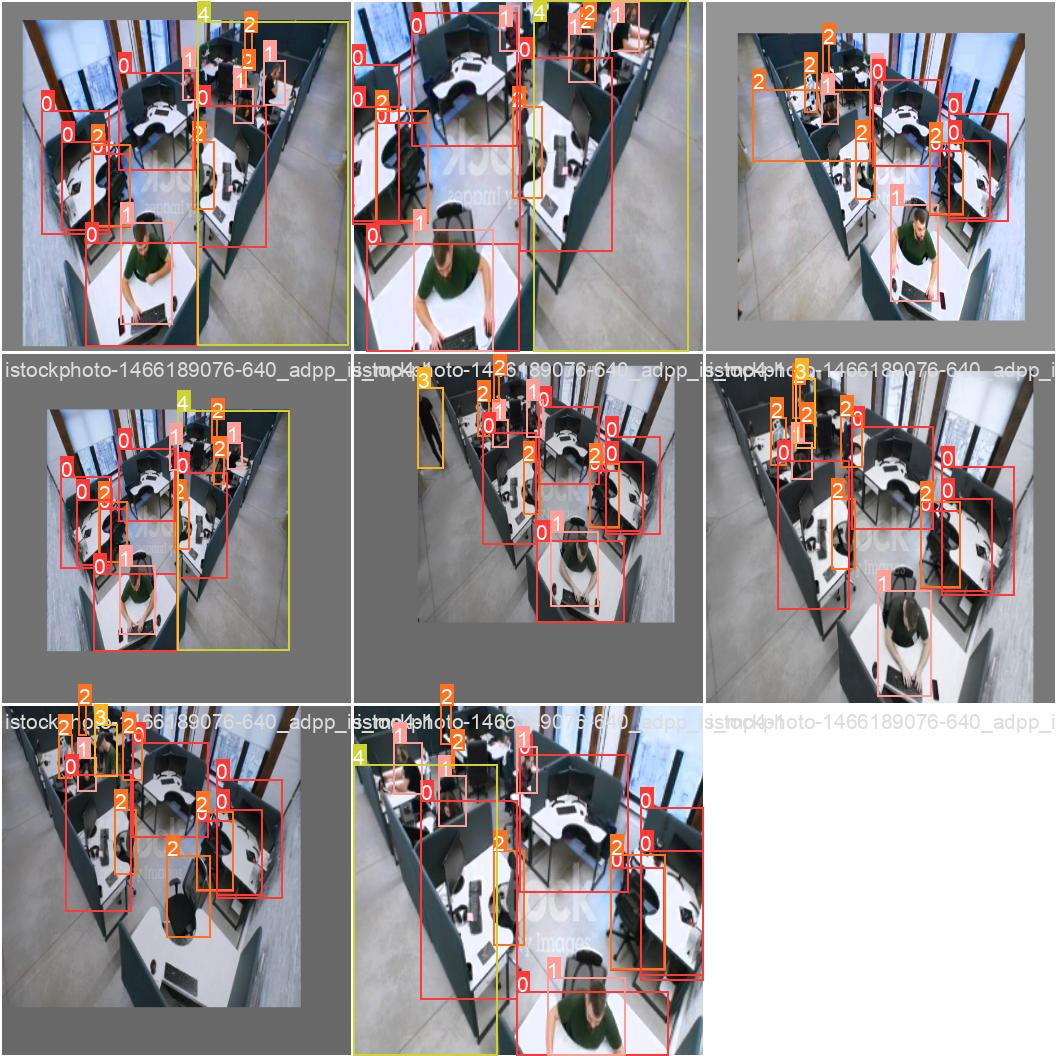

In [21]:
Image(filename=f'/content/runs/detect/train/train_batch961.jpg', width=600)

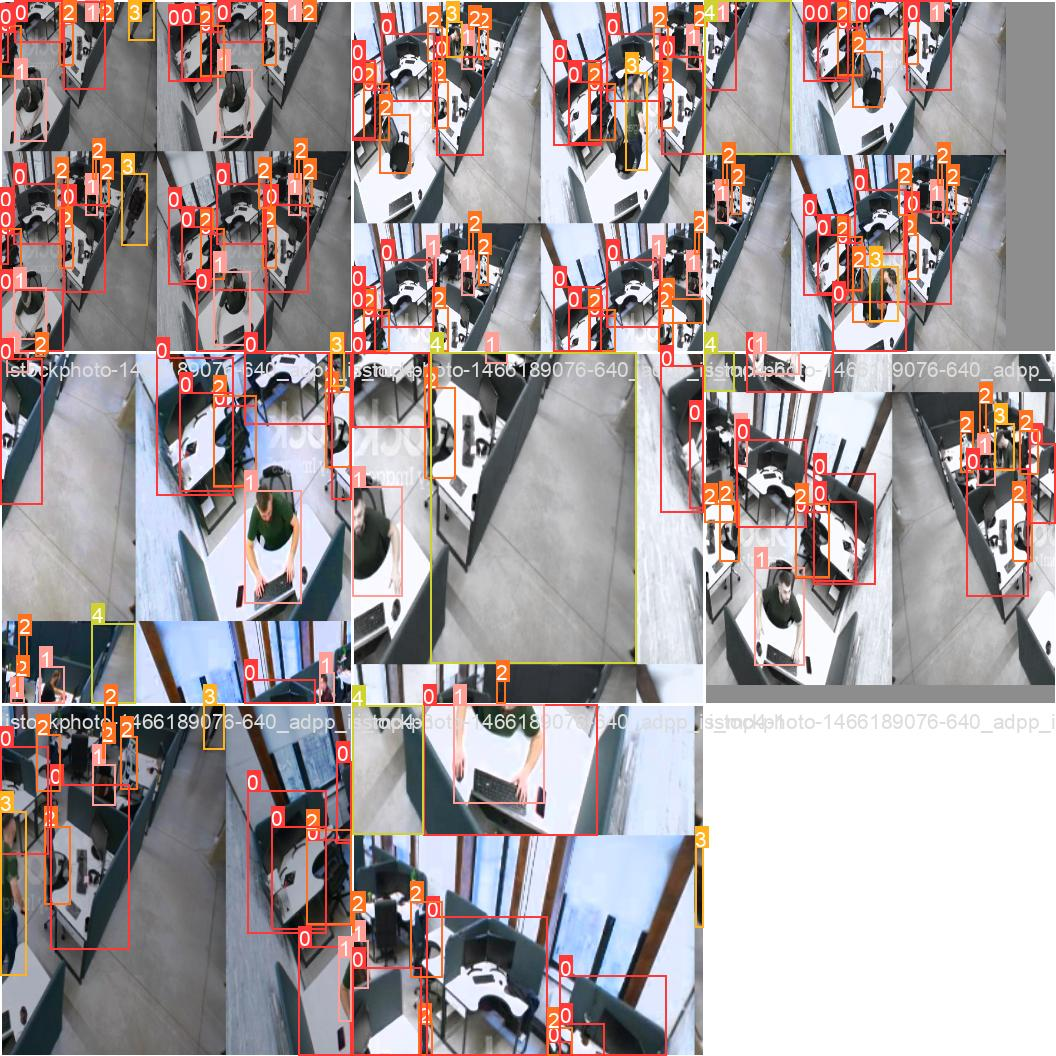

In [22]:
Image(filename=f'/content/runs/detect/train/train_batch0.jpg', width=600)

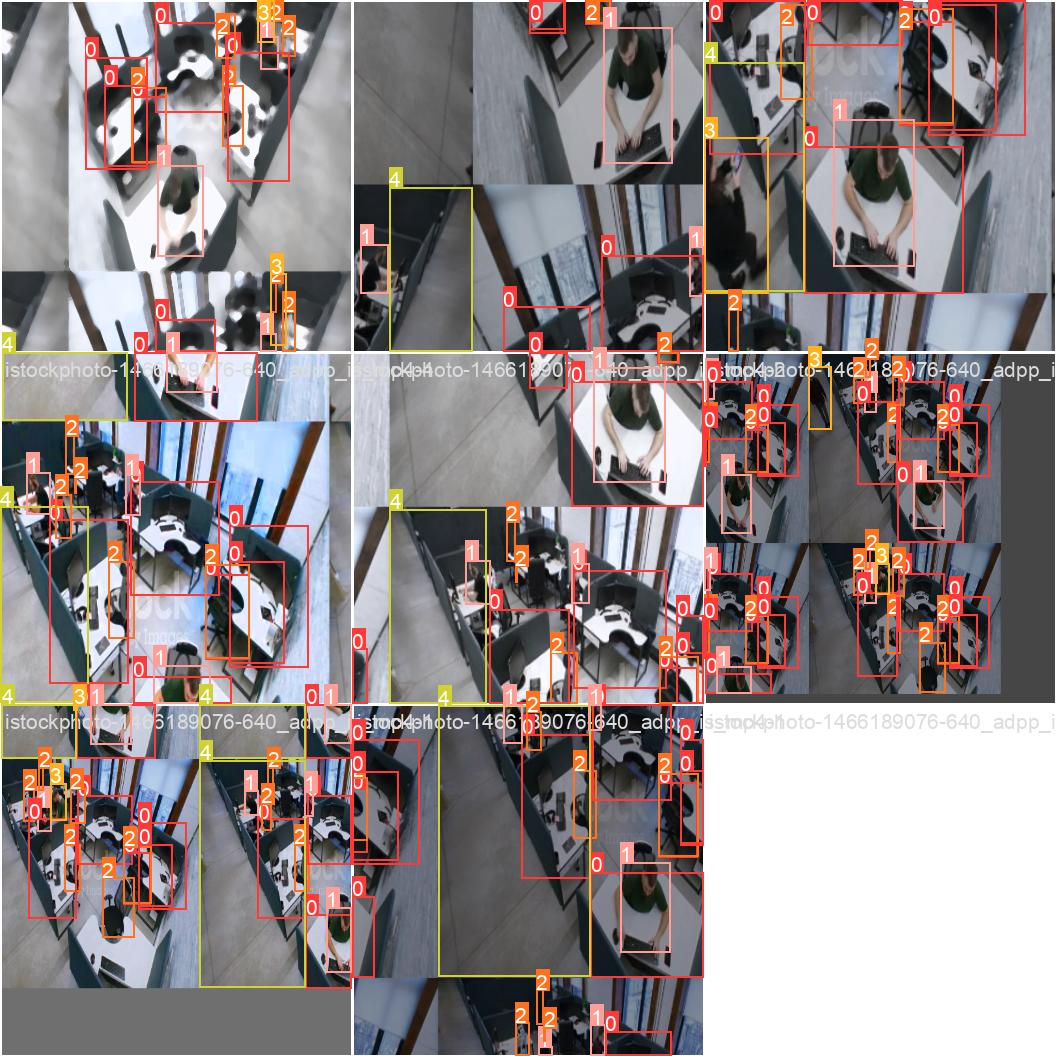

In [23]:
Image(filename=f'/content/runs/detect/train/train_batch1.jpg', width=600)

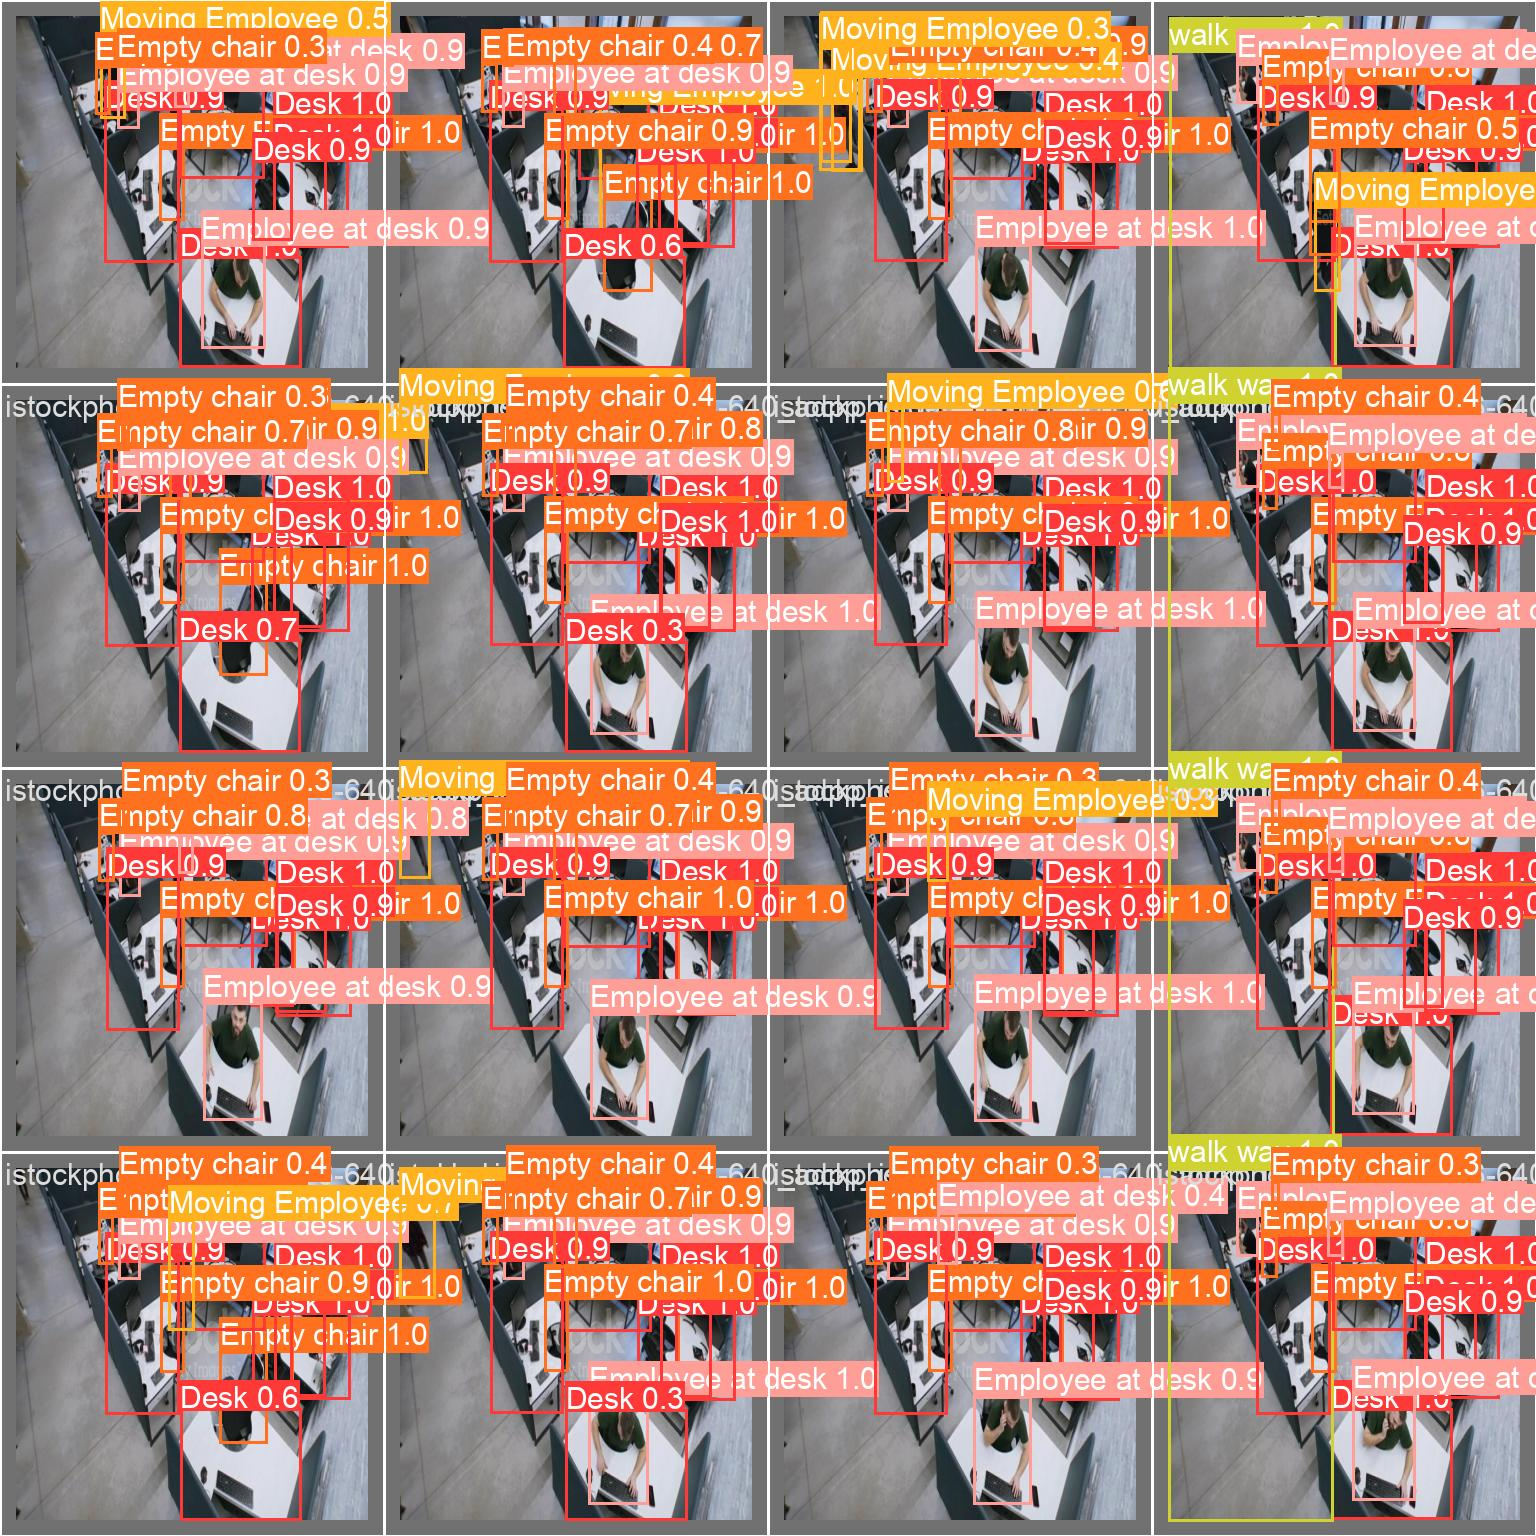

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch0_pred.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

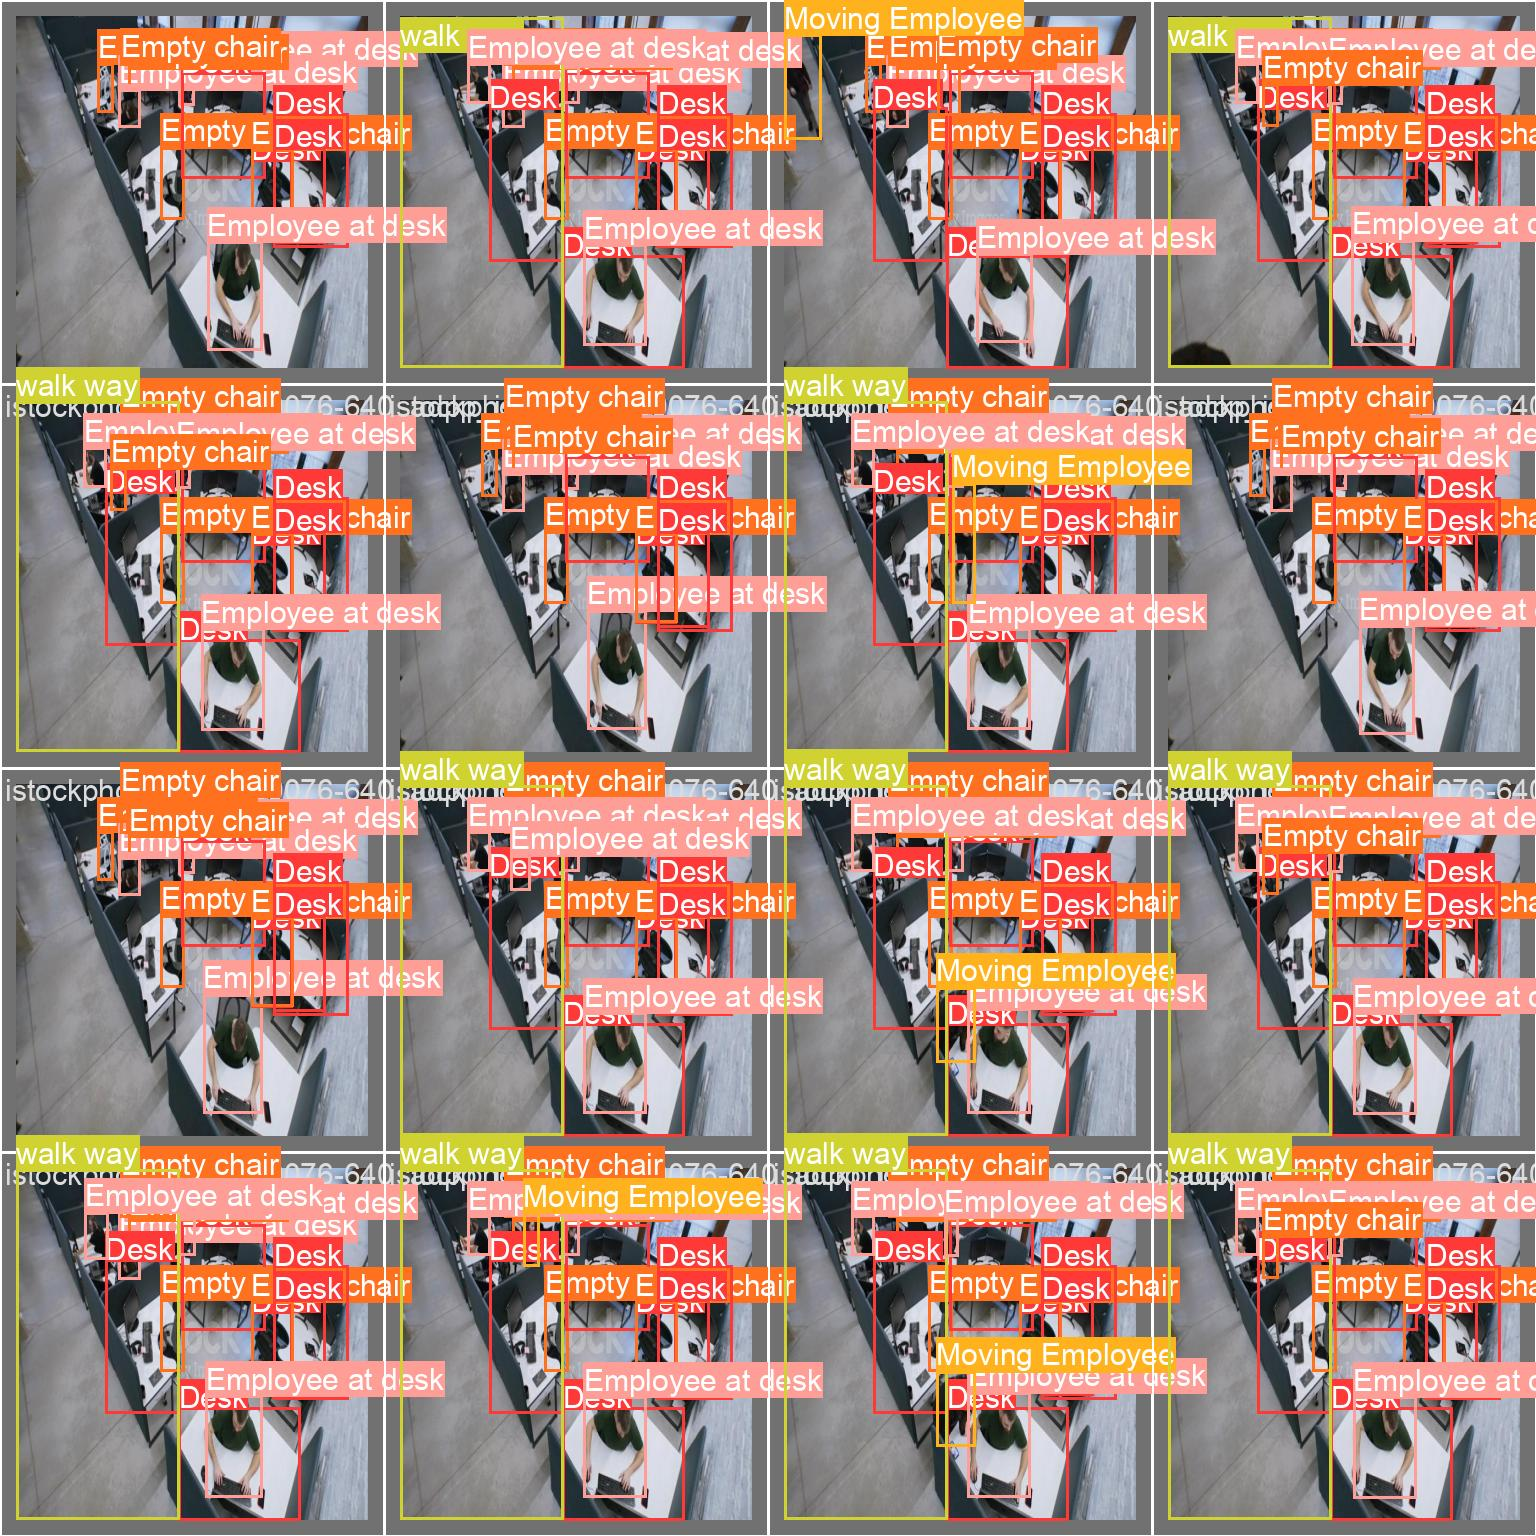

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch1_labels.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

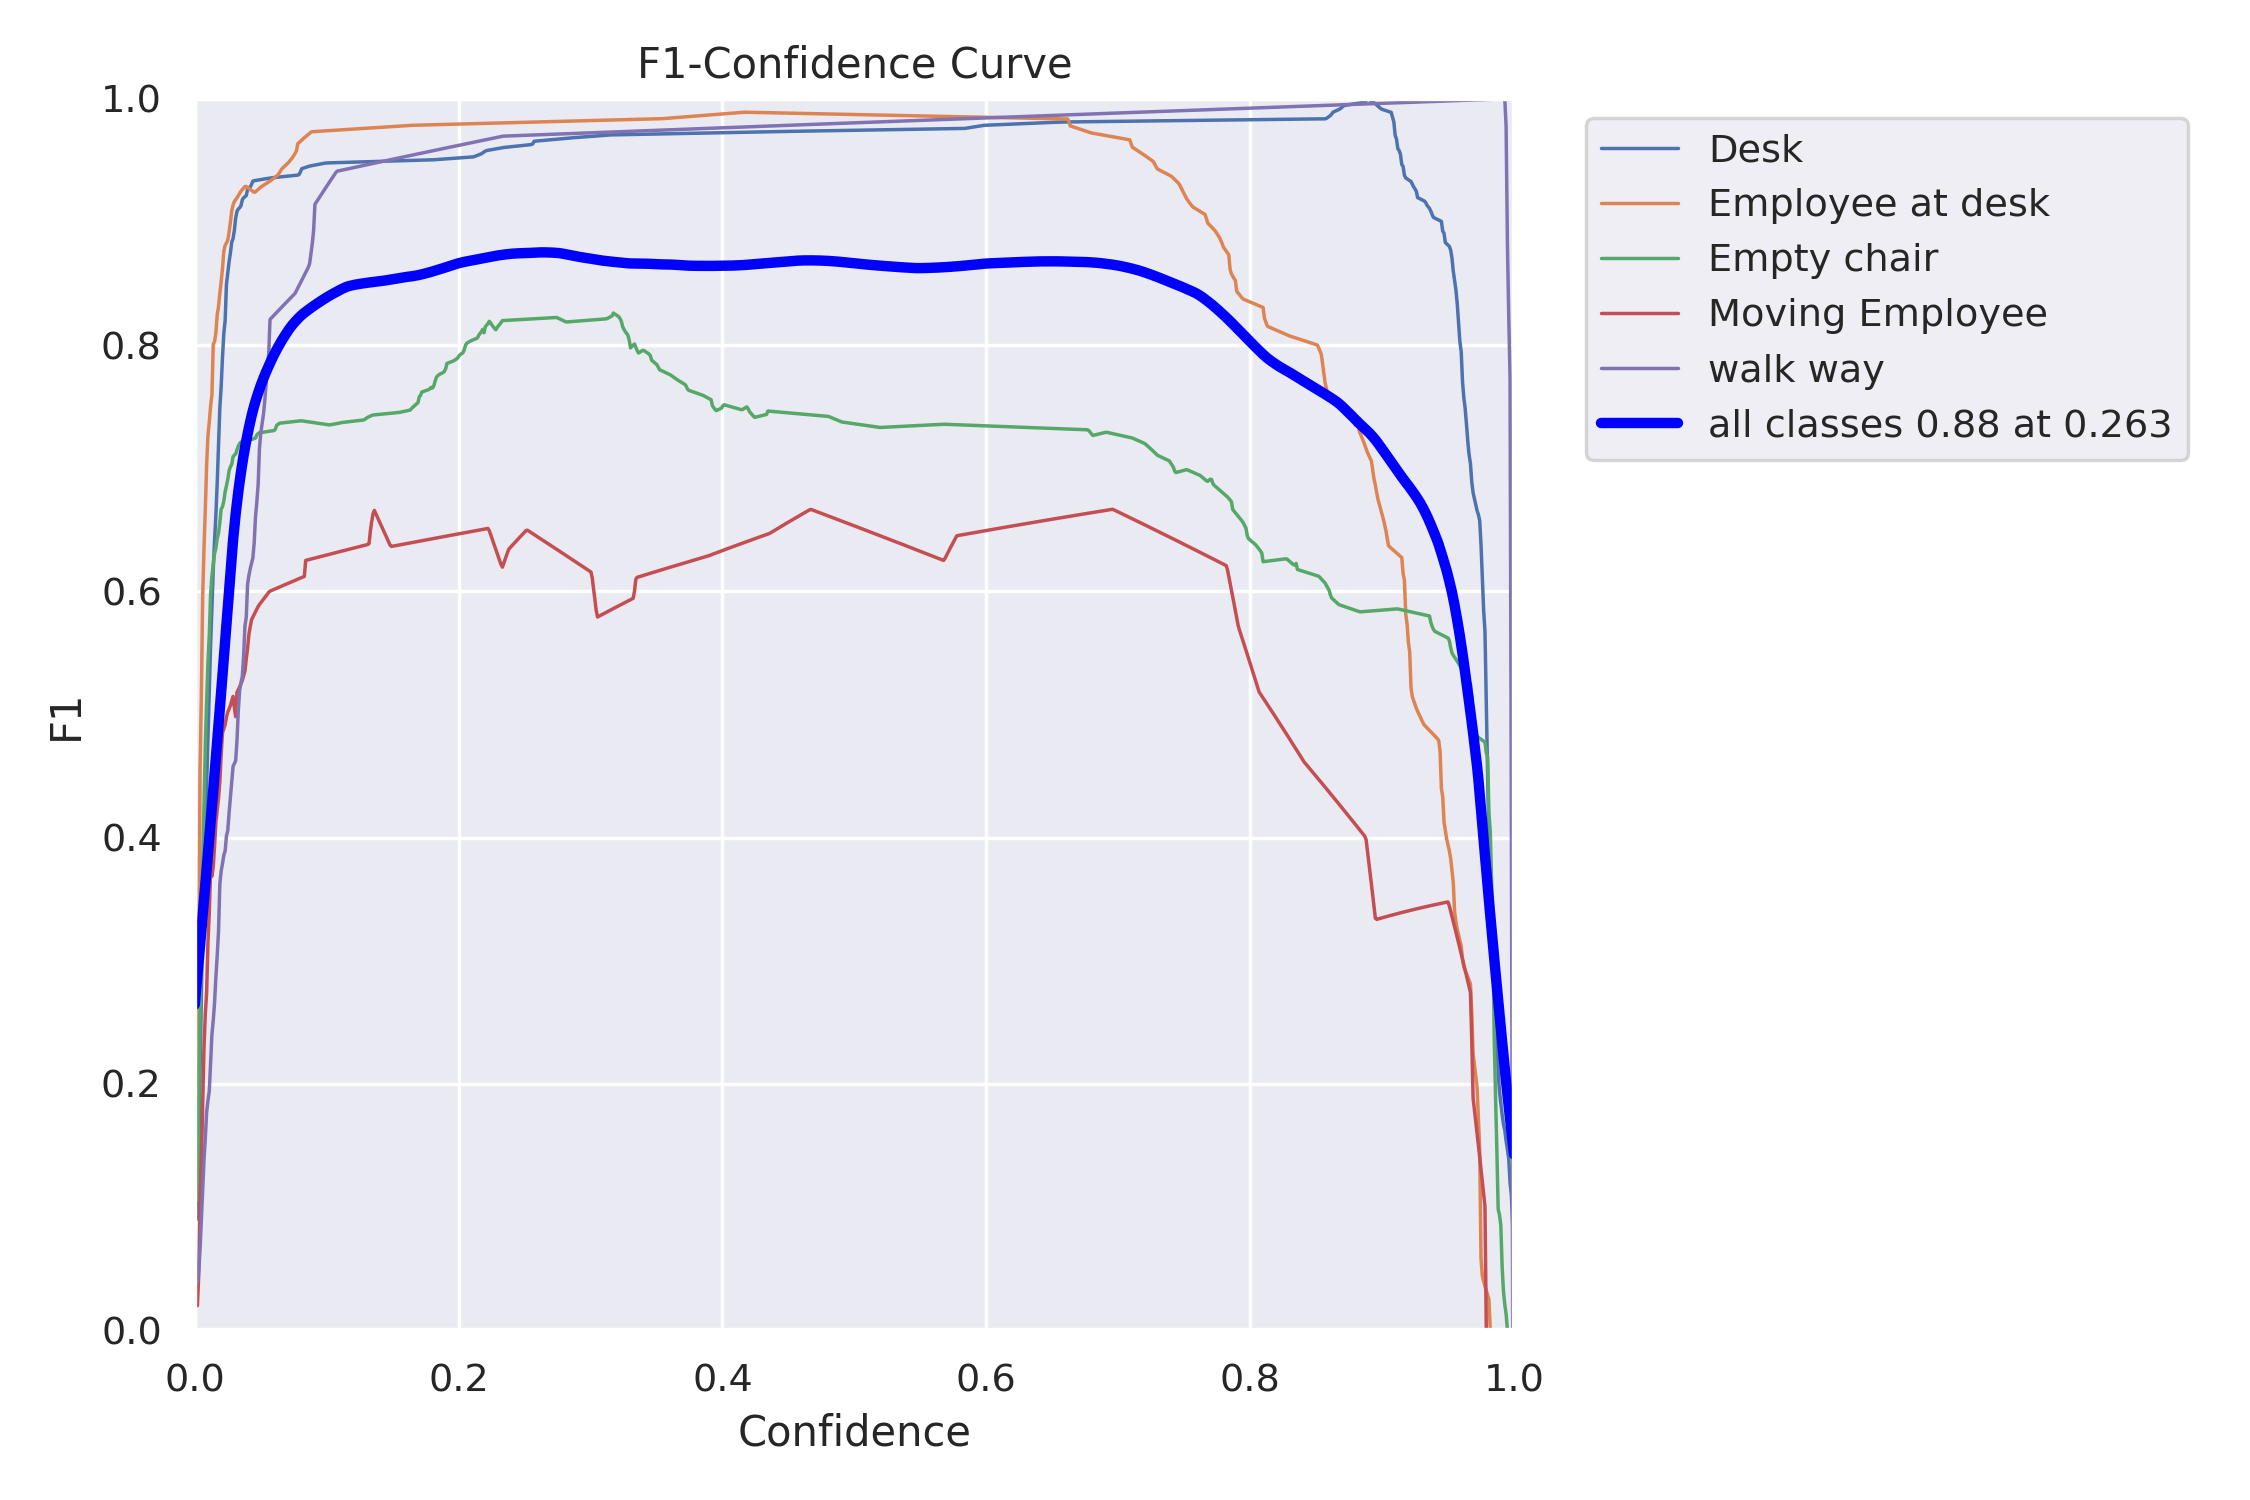

In [26]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=600)

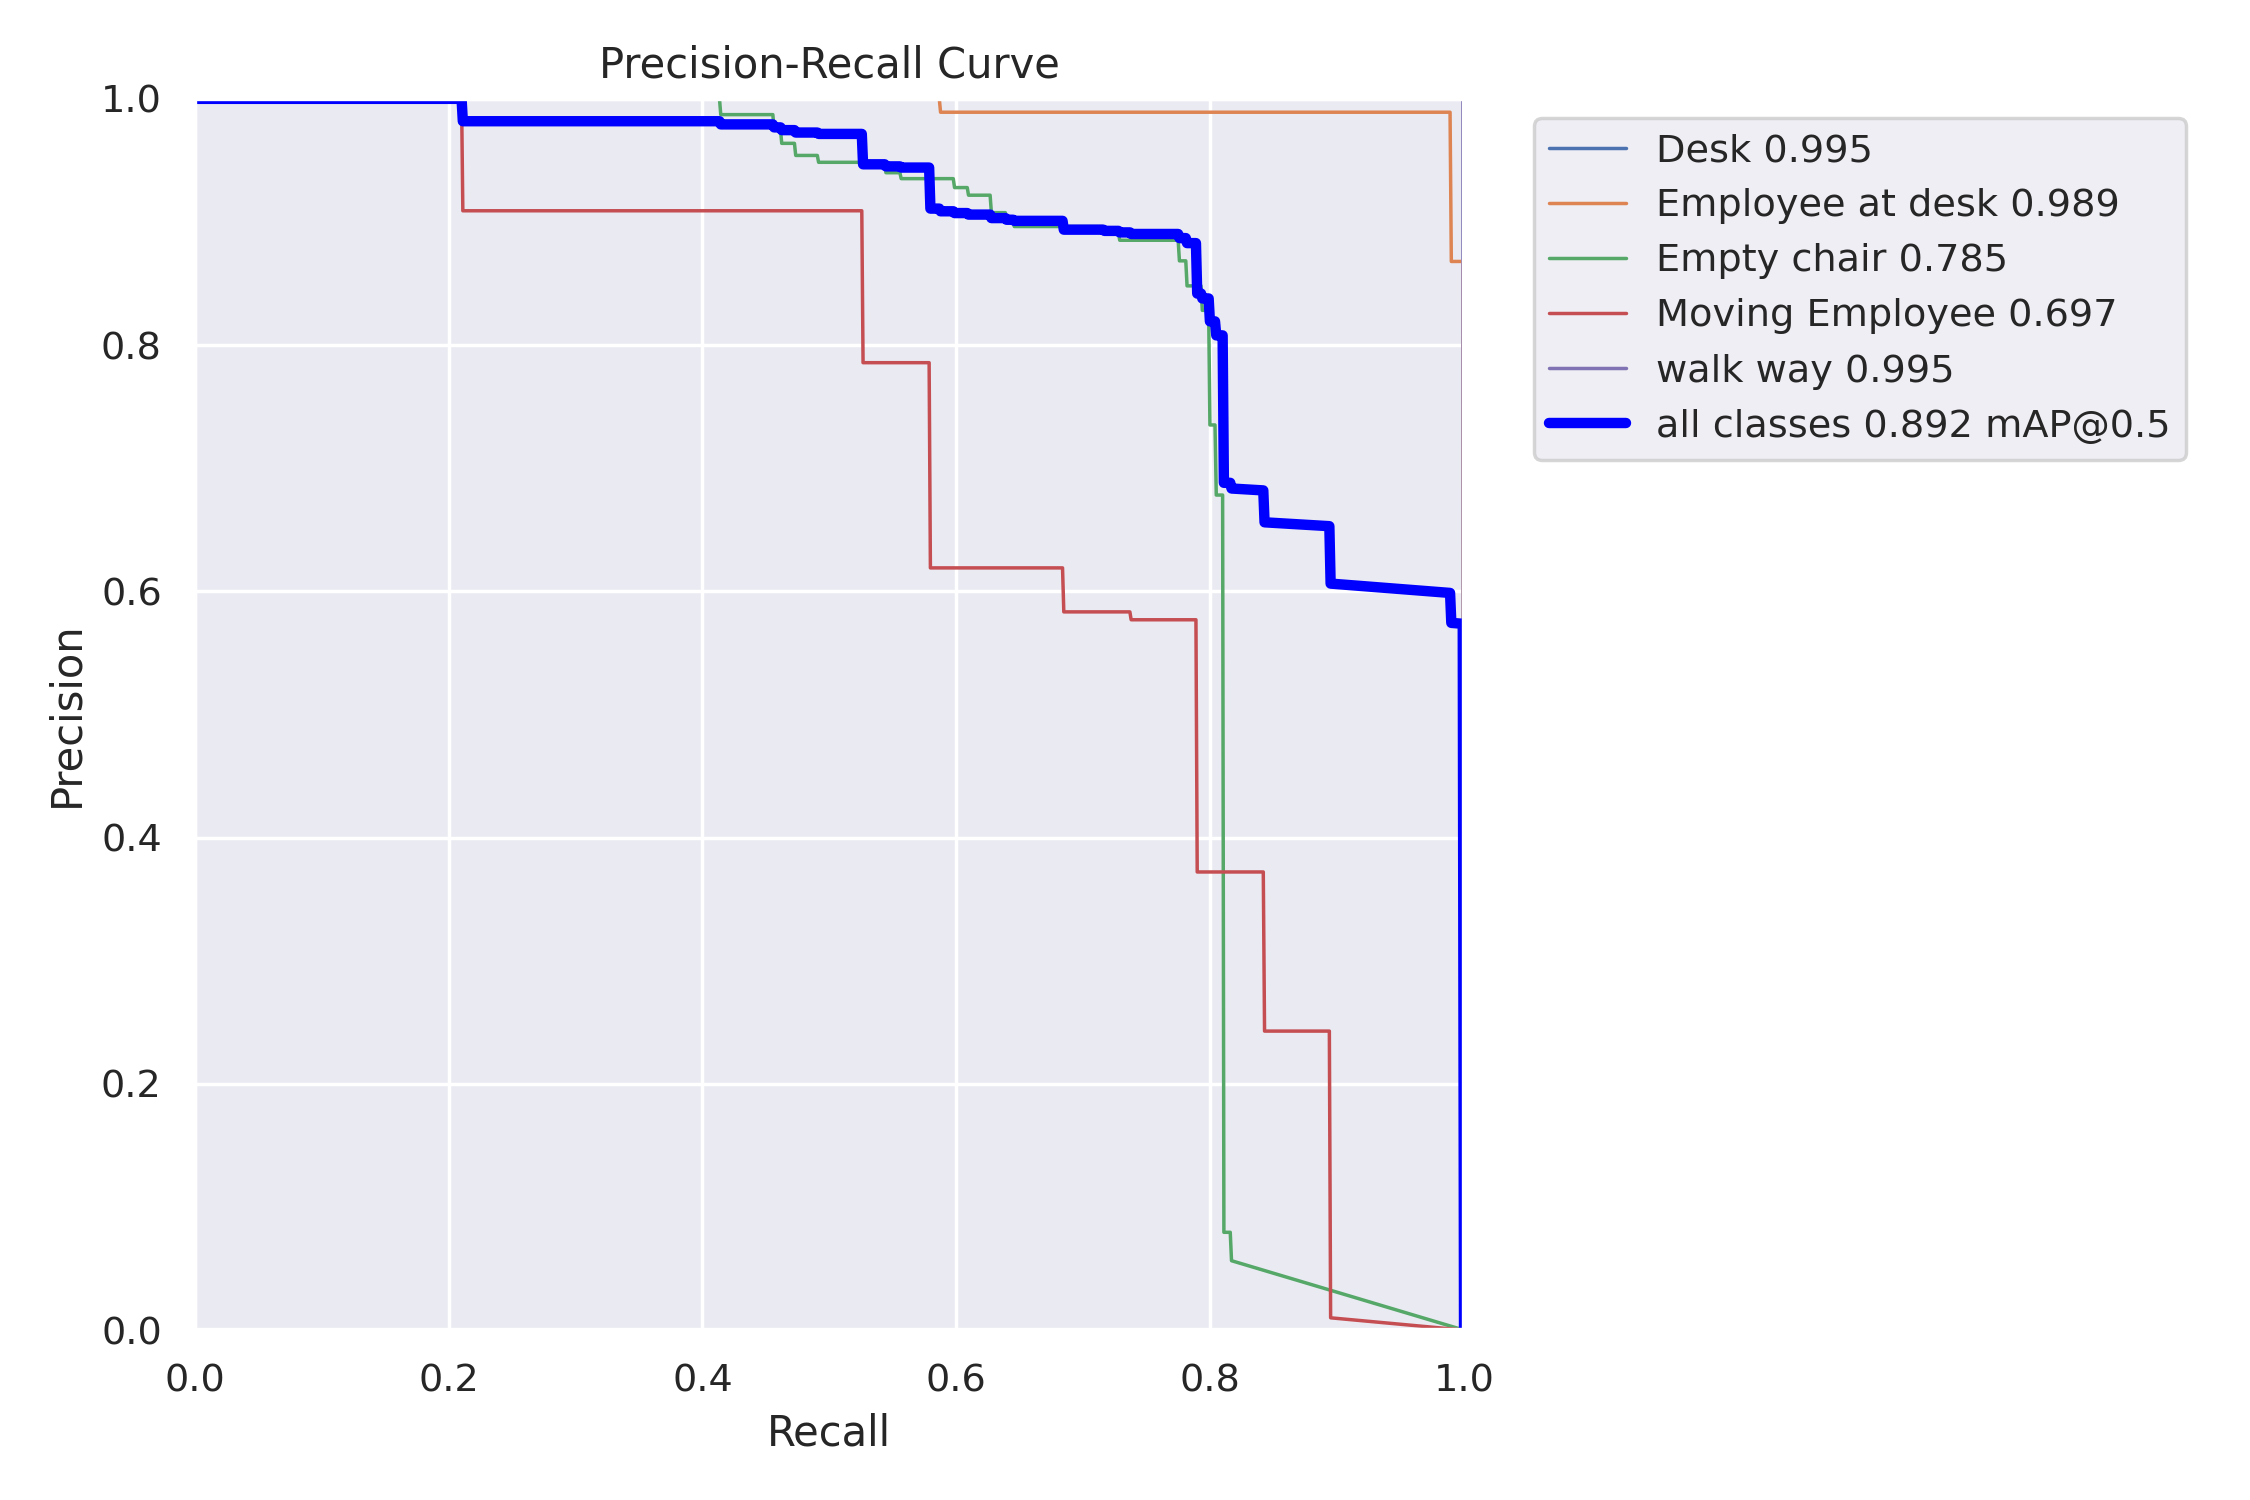

In [27]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)

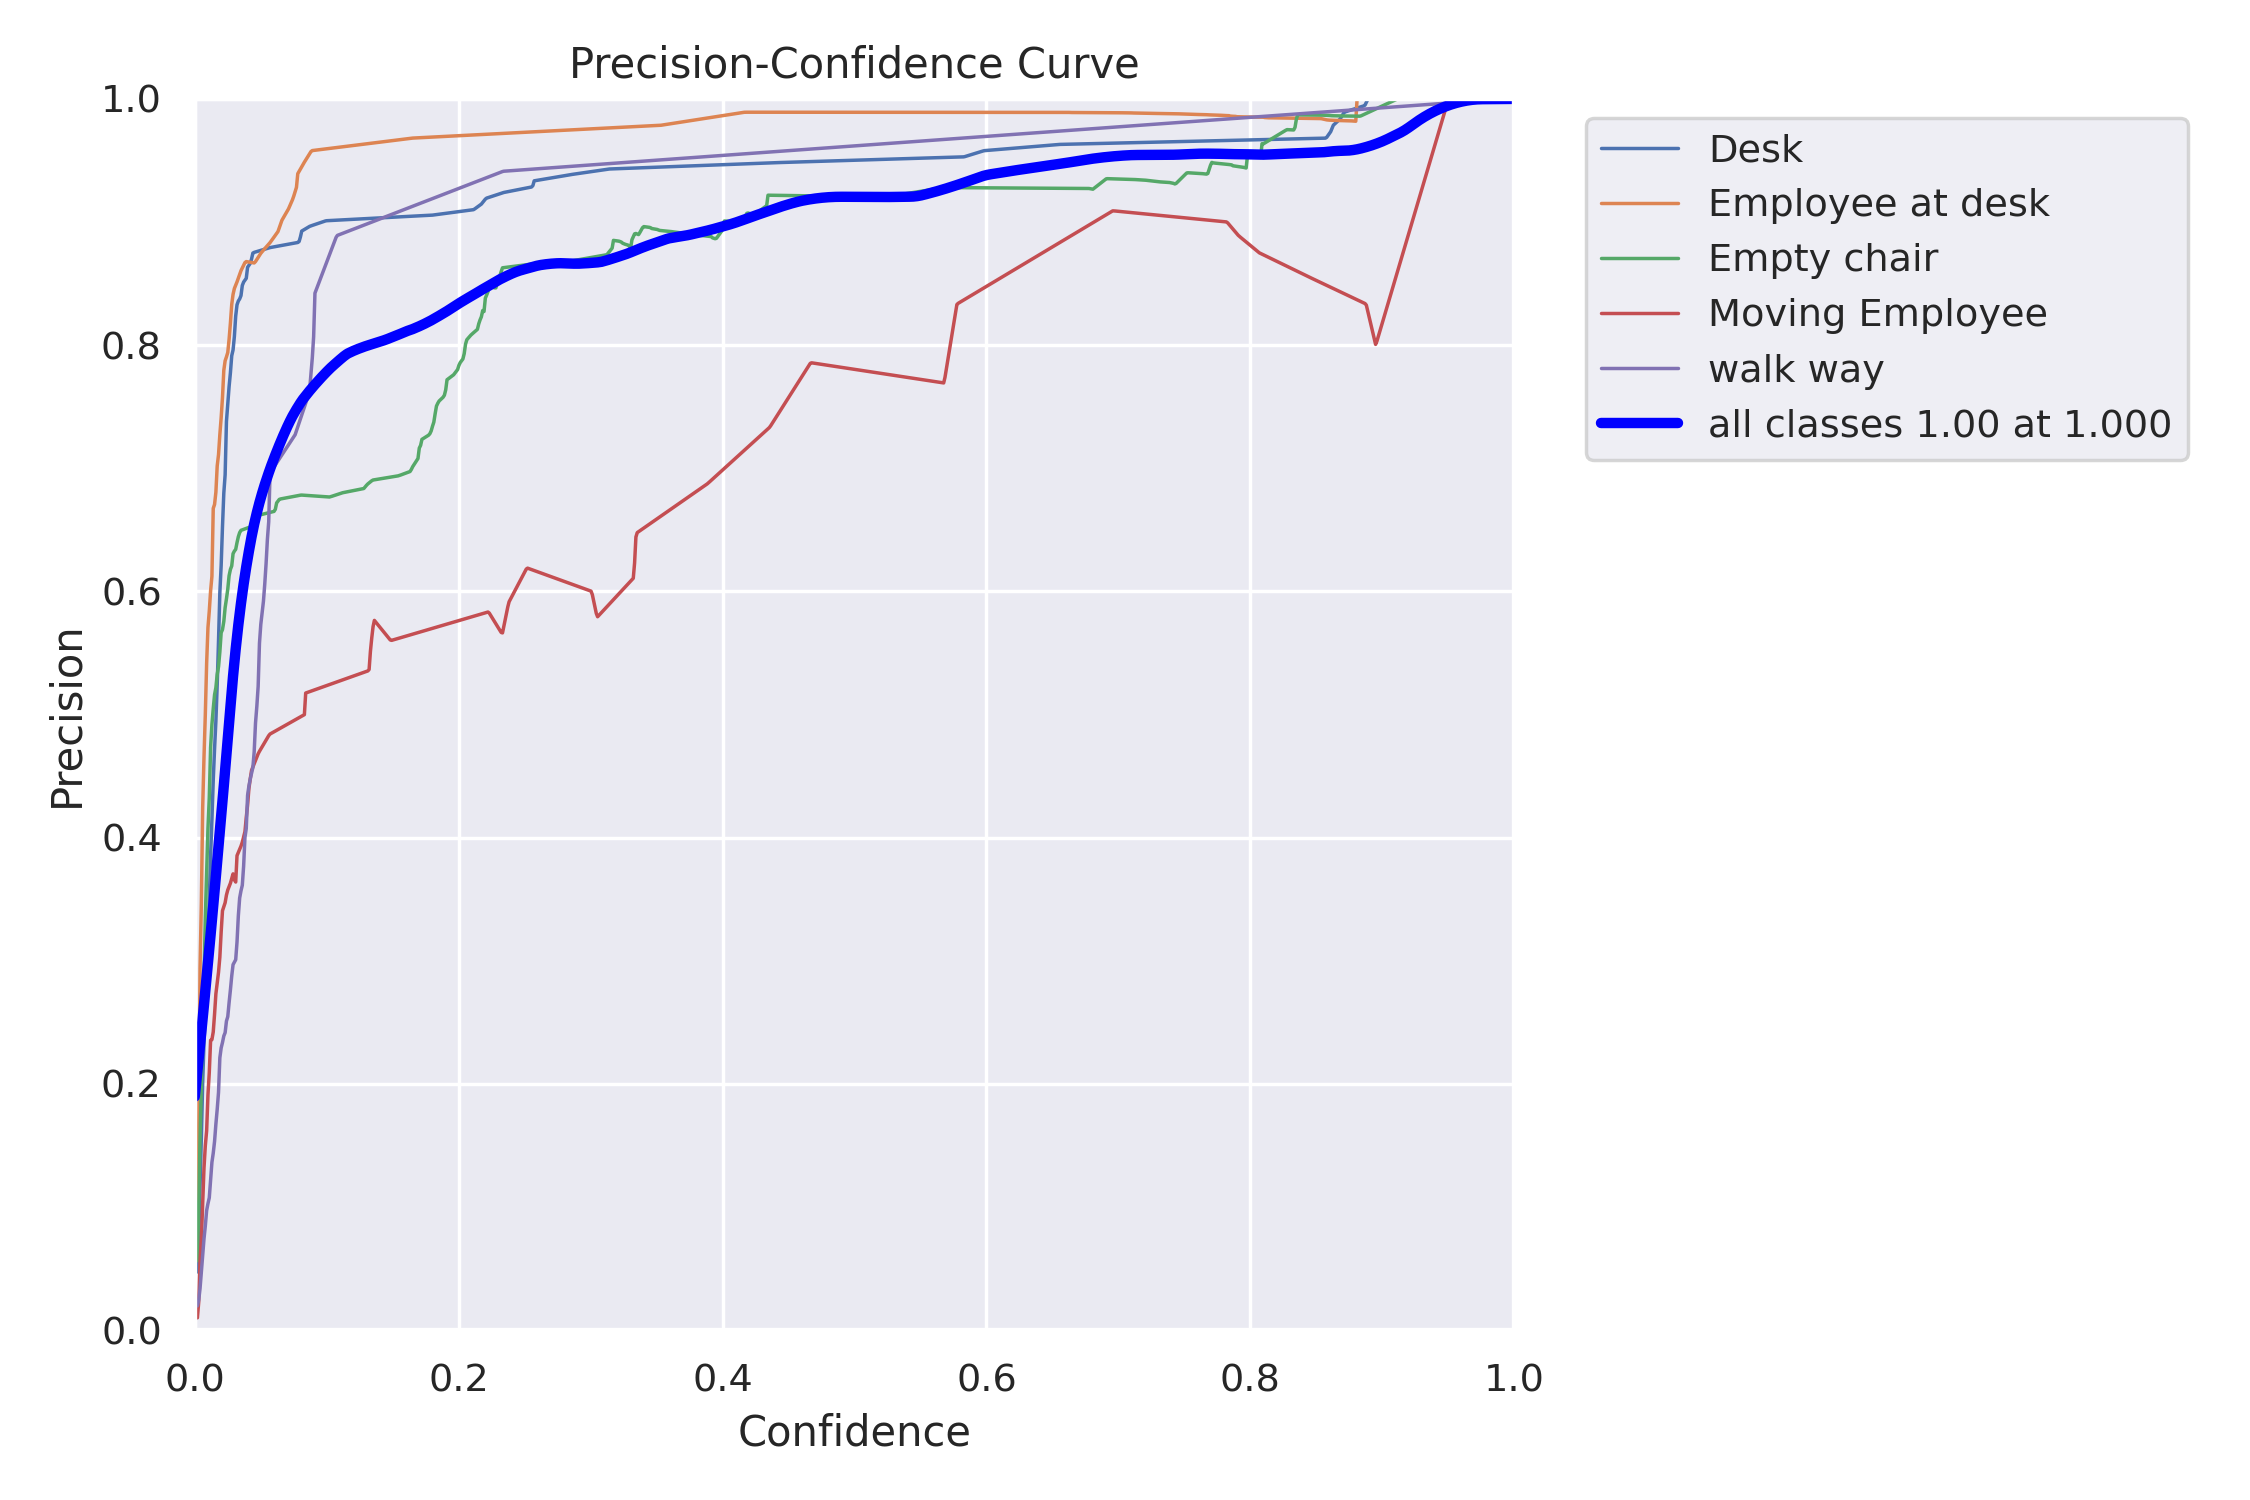

In [28]:
Image(filename=f'/content/runs/detect/train/P_curve.png', width=600)

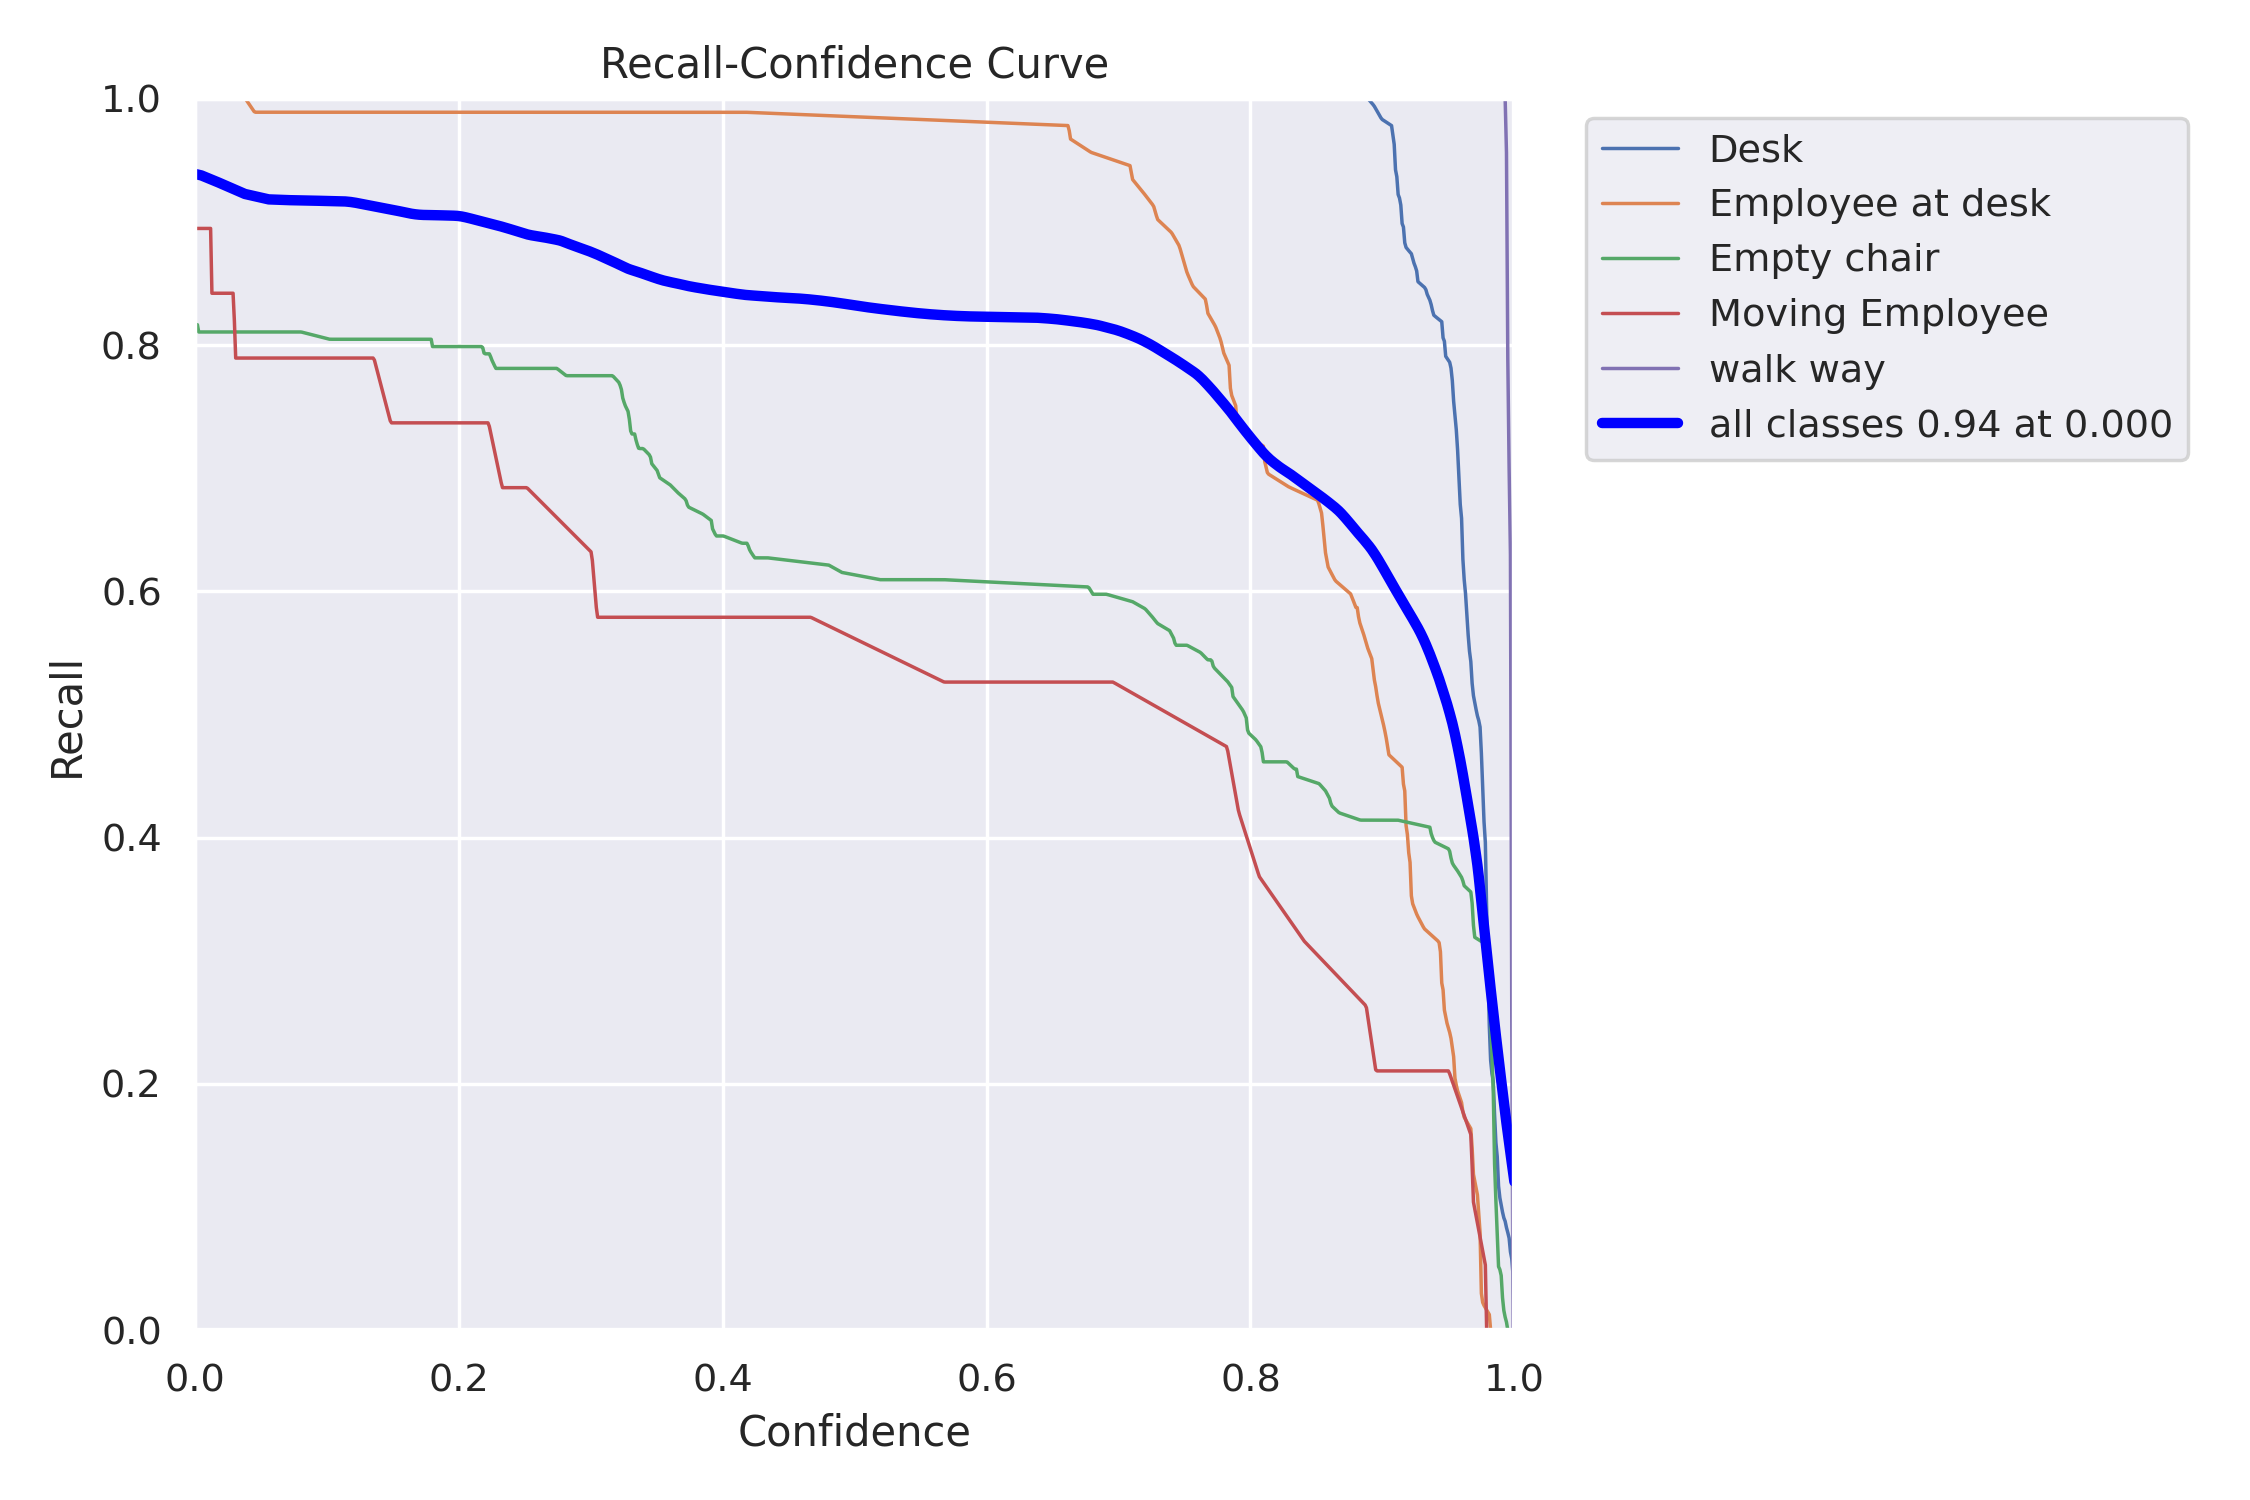

In [29]:
Image(filename=f'/content/runs/detect/train/R_curve.png', width=600)

In [31]:
import csv

file_path = '/content/runs/detect/train/results.csv'

# Read and print CSV file
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)

['                  epoch', '         train/box_loss', '         train/cls_loss', '         train/dfl_loss', '   metrics/precision(B)', '      metrics/recall(B)', '       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '           val/box_loss', '           val/cls_loss', '           val/dfl_loss', '                 lr/pg0', '                 lr/pg1', '                 lr/pg2']
['                      0', '                 2.2878', '                 4.0753', '                 1.9379', '                0.01426', '                0.36561', '                0.02503', '                0.01274', '                 1.5891', '                 3.7681', '                 1.2753', '                 0.0865', '                 0.0015', '                 0.0015']
['                      1', '                 1.6689', '                 3.8933', '                 1.5278', '                0.01048', '                0.25597', '                0.02585', '                0.01047', '                 1.3338'